In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np

# Generate artificial data 

In [61]:
from random import randrange, shuffle
length = 90
df = pd.DataFrame({
    "PLZ":list(range(1000,1000+length)),
    "YEAR":["2014"]*length
})
i = 0
data = list()
while len(data) < length:
    data += [i]*randrange(1,length-len(data)+1)
    i=i+1
df["CAT"] = pd.Series(data, dtype="category")
temp_df = df.copy()
for year in ["2015","2016","2017"]:
    temp_df["YEAR"]=year
    df=df.append(temp_df)
df["COUNT"] = [randrange(10000,1000000) for x in range(len(df["CAT"]))]
df["POSITIVE"] = df["COUNT"].map(lambda x:  max(3,int( randrange( int(x/1000)+1) ) ))

# Plot distribution 

In [62]:
df_x = df.groupby(["CAT","YEAR"]).agg({"PLZ":"count","COUNT":"sum","POSITIVE":"sum"})
df_x["FREQ"] = df_x["POSITIVE"]/df_x["COUNT"]
from scipy.stats import poisson 
df_x["05"] = df_x.apply(lambda x: poisson.ppf(0.05,x["POSITIVE"]), axis=1).fillna("0")
df_x["95"] = df_x.apply(lambda x: poisson.ppf(0.95,x["POSITIVE"]), axis=1).fillna("0")

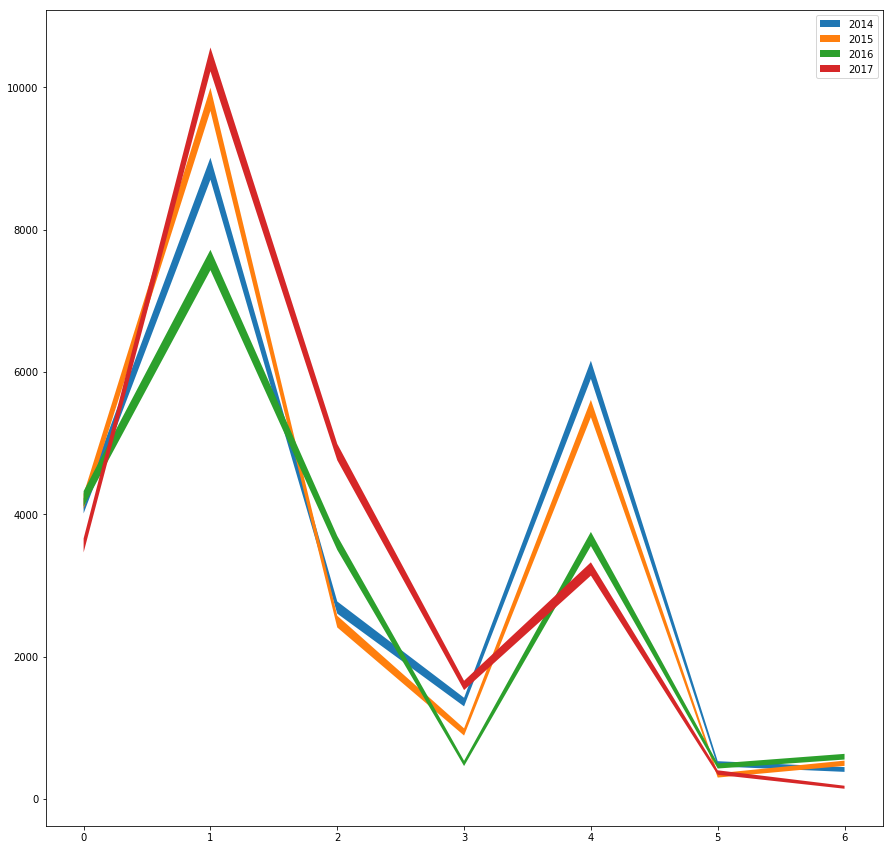

In [63]:
fig, ax = plt.subplots(1,1,figsize=(15,15))
for grp in df_x.reset_index().groupby("YEAR"):
    d = grp[1].reset_index()
    #display(d["CAT"].values.reshape(-1,1).shape[1])
    #plt.plot(d["CAT"],d["COUNT"])
    plt.fill_between(d["CAT"],d["05"],d["95"], alpha=1, lw=3, label="{year}".format(year=grp[0]))
    plt.legend()  